## Lets Perform outlier detection !

#### Here the list of data visualization plots to spot the outliers.
    1. Box and whisker plot (box plot).
    2. Scatter plot.
    3. Histogram.
    4. Distribution Plot.


In [118]:
def plot(df, col):
    fig , (ax1 , ax2 , ax3) = plt.subplots(3,1)
    
    sns.distplot(df[col] , ax=ax1)
    sns.boxplot(df[col] , ax=ax2)
    sns.distplot(df[col] , ax=ax3 , kde=False)

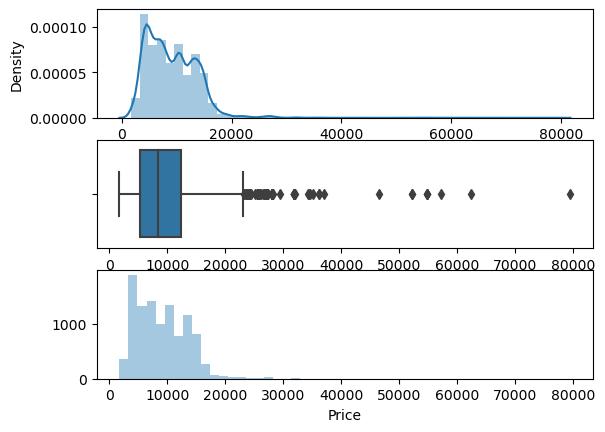

In [119]:
plot(data , 'Price')

        If Features Are Skewed We Use the below Technique which is IQR Data which are greater than IQR +1.5 IQR and data which are below than IQR - 1.5 IQR are my outliers where , IQR = 75th%ile data - 25th%ile data & IQR +- 1.5 IQR  will be changed depending upon the domain ie it could be sometimes IQR +- 3IQR 
          


In [121]:
q1 = data['Price'].quantile(0.25)
q3 = data['Price'].quantile(0.75)

iqr = q3- q1

maximum = q3 + 1.5*iqr
minimum = q1 - 1.5*iqr

In [122]:
print(maximum)

23017.0


In [123]:
print(minimum)

-5367.0


In [126]:
print([price for price in data['Price'] if price> maximum or price<minimum])

[27430, 36983, 26890, 26890, 25139, 27210, 52229, 26743, 26890, 25735, 27992, 26890, 26890, 23583, 26890, 23533, 24115, 25735, 54826, 31783, 27992, 26890, 26890, 25430, 36235, 27210, 26890, 25735, 54826, 26890, 35185, 79512, 28097, 27992, 26890, 25735, 26092, 31825, 25913, 25735, 27992, 31825, 23267, 62427, 54826, 31825, 25430, 26890, 36235, 23843, 26890, 25735, 28322, 25735, 25735, 31825, 26890, 27992, 34273, 46490, 29528, 26890, 26890, 26890, 34503, 26890, 27992, 26890, 26890, 23170, 24528, 26890, 27992, 25735, 34608, 25703, 26890, 23528, 31825, 27282, 25735, 27992, 52285, 24017, 31945, 26890, 24318, 23677, 27992, 24210, 57209, 26890, 31825, 26480]


In [127]:
len([price for price in data['Price'] if price> maximum or price<minimum])

94

### How to deal with Outlier

In [129]:
### wherever I have price >35K just replace replace it with median of Price

data['Price'] = np.where(data['Price']>=35000 , data['Price'].median() , data['Price'])

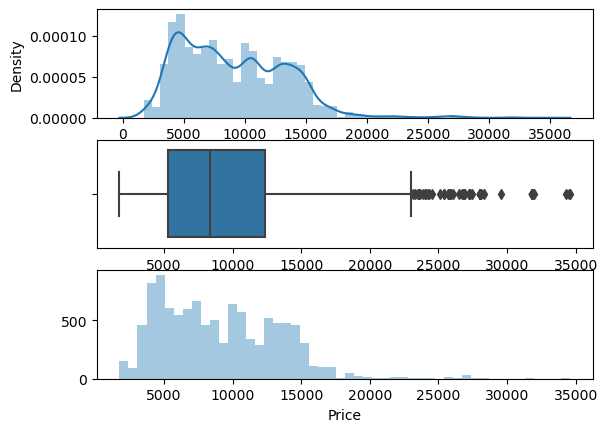

In [130]:
plot(data , 'Price')

## Lets Perform feature selection

In [134]:
X = data.drop(['Price'] , axis=1)

In [132]:
y = data['Price']

In [135]:
from sklearn.feature_selection import mutual_info_regression

In [136]:
imp = mutual_info_regression(X , y)

In [137]:
imp

array([0.97817067, 1.00276815, 0.78910531, 0.18819494, 0.24499169,
       0.33867287, 0.26424611, 0.40629992, 0.35573934, 0.46581843,
       0.344347  , 0.39219058, 0.46201314, 0.52335437, 0.1418939 ,
       0.19824146])

In [140]:
imp_df = pd.DataFrame(imp , index=X.columns)

In [142]:
imp_df.columns = ['importance']

In [143]:
imp_df

,importance
Airline,0.978171
Destination,1.002768
Total_Stops,0.789105
Journey_day,0.188195
Journey_month,0.244992
Dep_Time_hour,0.338673
Dep_Time_minute,0.264246
Arrival_Time_hour,0.406300
Arrival_Time_minute,0.355739
Duration_hours,0.465818


In [145]:
imp_df.sort_values(by='importance' , ascending=False)

,importance
Destination,1.002768
Airline,0.978171
Total_Stops,0.789105
Source_Delhi,0.523354
Duration_hours,0.465818
Source_Kolkata,0.462013
Arrival_Time_hour,0.406300
Source_Banglore,0.392191
Arrival_Time_minute,0.355739
Duration_mins,0.344347
